In [1]:
import numpy as np
import iDEA
import matplotlib
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-30, 30, 301)
v_ext = -(6.0/5.0)*np.exp(-(1.0/125.0)*(x-15.0)**4)-(9.0/10.0)*np.exp(-(1.0/10.0)*(x+15.0)**2)
v_int = iDEA.interactions.softened_interaction(x)
electrons = 'uu'
double_well = iDEA.system.System(x, v_ext, v_int, electrons)

In [3]:
state_exact = iDEA.methods.interacting.solve(double_well, k=0)
n_exact = iDEA.observables.density(double_well, state=state_exact)
kohn_sham_system = iDEA.reverse_engineering.reverse(double_well, n_exact, method=iDEA.methods.non_interacting, mu=0.5, pe = 0.05)
v_ks = kohn_sham_system.v_ext
v_h = iDEA.observables.hartree_potential(double_well, n_exact)
v_xc = v_ks - double_well.v_ext - v_h

iDEA.reverse.reverse: convergence = 1.029e-12, tollerance = 1e-122


In [4]:
state_non = iDEA.methods.non_interacting.solve(double_well, k=0)
n_non = iDEA.observables.density(double_well, state=state_non)

iDEA.methods.non_interacting.solve: convergence = 3.2618e-12, tollerance = 1e-10


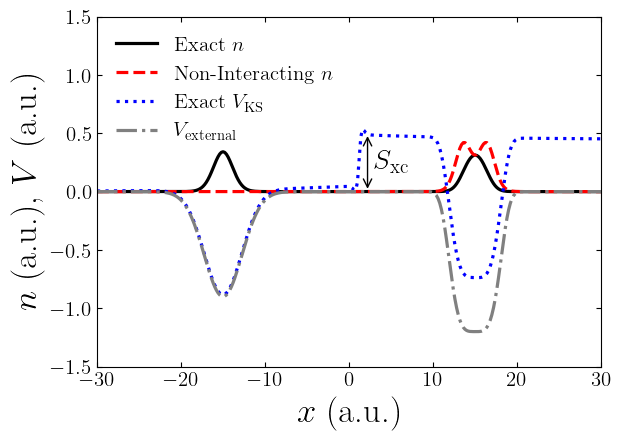

In [5]:
# Set figure size.
matplotlib.rcParams['figure.figsize'] = [7, 5]

# Build plot.
plt.plot(double_well.x, n_exact, linestyle='solid',linewidth=2.3, label='Exact $n$', color='k')
plt.plot(double_well.x, n_non, linestyle='dashed',linewidth=2.3, label='Non-Interacting $n$', color='r')
plt.plot(double_well.x, v_ks+0.45, linestyle='dotted',linewidth=2.3, label='Exact $V_{\mathrm{KS}}$', color='b')
plt.plot(double_well.x, double_well.v_ext, linestyle='dashdot',linewidth=2.3, label='$V_{\mathrm{external}}$', color='grey')

# Add the legend.
plt.legend(frameon=False)

# Configure axes.
plt.xlabel(r'$x$ (a.u.)', size=25)
plt.ylabel(r'$n$ (a.u.), $V$ (a.u.)', size=25)
plt.xlim(-30.0, 30.0)
plt.ylim(-1.5, 1.5)

# Add annotations.
plt.text(3, 0.2, "$S_\mathrm{xc}$", fontsize=20)
plt.annotate("", xy=(2.2, 0.5), xytext=(2.2, 0), arrowprops=dict(arrowstyle="<->"))

# Clean up.
plt.tick_params(top='on', right='on')
plt.tick_params(direction='in')
plt.gcf().subplots_adjust(left=0.18)
plt.gcf().subplots_adjust(bottom=0.18)

# Show.
plt.show()

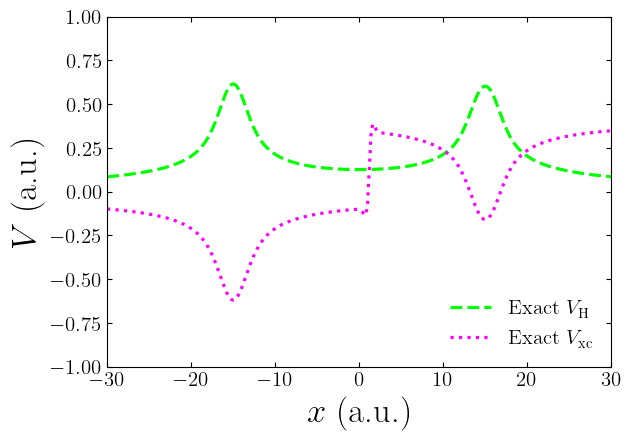

In [6]:
# Set figure size.
matplotlib.rcParams['figure.figsize'] = [7, 5]

# Build plot.
plt.plot(double_well.x, v_h, linestyle='dashed',linewidth=2.3, label='Exact $V_{\mathrm{H}}$', color='lime')
plt.plot(double_well.x, v_xc+ 0.43, linestyle='dotted',linewidth=2.3, label='Exact $V_{\mathrm{xc}}$', color='fuchsia')

# Add the legend.
plt.legend(frameon=False)

# Configure axes.
plt.xlabel(r'$x$ (a.u.)', size=25)
plt.ylabel(r'$V$ (a.u.)', size=25)
plt.xlim(-30.0, 30.0)
plt.ylim(-1.0, 1.0)

# Clean up.
plt.tick_params(top='on', right='on')
plt.tick_params(direction='in')
plt.gcf().subplots_adjust(left=0.18)
plt.gcf().subplots_adjust(bottom=0.18)

# Show.
plt.show()

In [7]:
state_hf = iDEA.methods.hartree_fock.solve(double_well, k=0)
n_hf = iDEA.observables.density(double_well, state=state_hf)
p_hf = iDEA.observables.density_matrix(double_well, state=state_hf)
v_x = iDEA.observables.exchange_potential(double_well, p_hf)

iDEA.methods.hartree_fock.solve: convergence = 8.8699e-11, tollerance = 1e-10


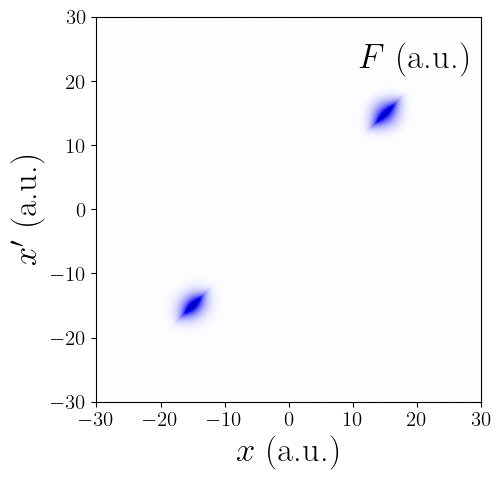

In [8]:
# Set figure size.
matplotlib.rcParams['figure.figsize'] = [7, 5]

# Build plot.
plt.imshow(np.flipud(v_x), vmin=-0.4, vmax=0.4, extent=[-30,30,-30,30], cmap='seismic', interpolation='hamming')
plt.xlabel(r'$x$ (a.u.)', size=25)
plt.ylabel(r'$x^\prime$ (a.u.)', size=25)

# Add annotations.
plt.text(11, 22, "$F$ (a.u.)", fontsize=25)

# Show.
plt.show()

In [9]:
# Function to calculate the effective potential felt by an orbital due to a non-local potential F.
def effective(F, orb, dx):
    potential = np.zeros(shape=orb.shape, dtype=float)
    p = 2.5e-13 # Small constent to smooth out spikes.
    for i in range(0,len(potential)):
        potential[i] = (np.sum(F[i,:]*(orb[:]))*dx)/(max(abs(orb[i]),p)*np.exp(1.0j*np.angle(orb[i])))
    return potential.real

In [10]:
orbital = state_hf.up.orbitals[:,1]
v_x_eff = effective(v_x, orbital, double_well.dx)

<ipython-input-9-8df7b702a49d>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  potential[i] = (np.sum(F[i,:]*(orb[:]))*dx)/(max(abs(orb[i]),p)*np.exp(1.0j*np.angle(orb[i])))


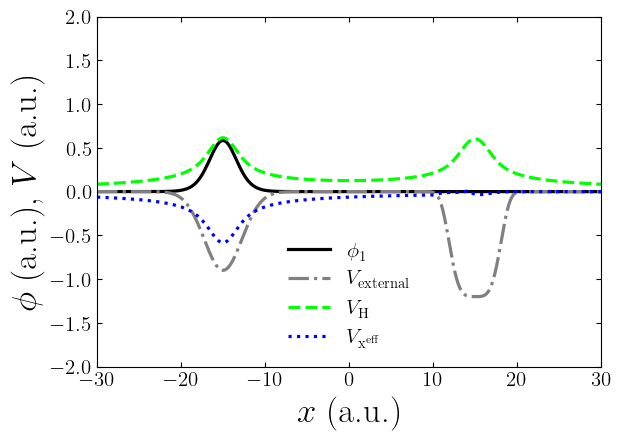

In [11]:
# Set figure size.
matplotlib.rcParams['figure.figsize'] = [7, 5]

# Build plot.
plt.plot(double_well.x, 1.0*orbital, linestyle='solid',linewidth=2.3, label='$\phi_1$', color='k')
plt.plot(double_well.x, double_well.v_ext, linestyle='dashdot',linewidth=2.3, label='$V_{\mathrm{external}}$', color='grey')
plt.plot(double_well.x, v_h, linestyle='dashed',linewidth=2.3, label='$V_{\mathrm{H}}$', color='lime')
plt.plot(double_well.x, v_x_eff, linestyle='dotted',linewidth=2.3, label='$V_{\mathrm{x}^{\mathrm{eff}}}$', color='b')

# Add the legend.
plt.legend(frameon=False)

# Configure axes.
plt.xlabel(r'$x$ (a.u.)', size=25)
plt.ylabel(r'$\phi$ (a.u.), $V$ (a.u.)', size=25)
plt.xlim(-30.0, 30.0)
plt.ylim(-2.0, 2.0)

# Clean up.
plt.tick_params(top='on', right='on')
plt.tick_params(direction='in')
plt.gcf().subplots_adjust(left=0.18)
plt.gcf().subplots_adjust(bottom=0.18)

# Show.
plt.show()

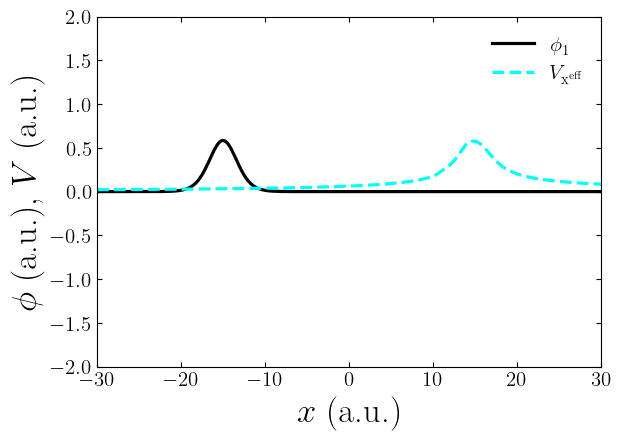

In [12]:
# Set figure size.
matplotlib.rcParams['figure.figsize'] = [7, 5]

# Build plot.
plt.plot(double_well.x, 1.0*orbital, linestyle='solid',linewidth=2.3, label='$\phi_1$', color='k')
plt.plot(double_well.x, v_h + v_x_eff, linestyle='dashed',linewidth=2.3, label='$V_{\mathrm{x}^{\mathrm{eff}}}$', color='aqua')

# Add the legend.
plt.legend(frameon=False)

# Configure axes.
plt.xlabel(r'$x$ (a.u.)', size=25)
plt.ylabel(r'$\phi$ (a.u.), $V$ (a.u.)', size=25)
plt.xlim(-30.0, 30.0)
plt.ylim(-2.0, 2.0)

# Clean up.
plt.tick_params(top='on', right='on')
plt.tick_params(direction='in')
plt.gcf().subplots_adjust(left=0.18)
plt.gcf().subplots_adjust(bottom=0.18)

# Show.
plt.show()

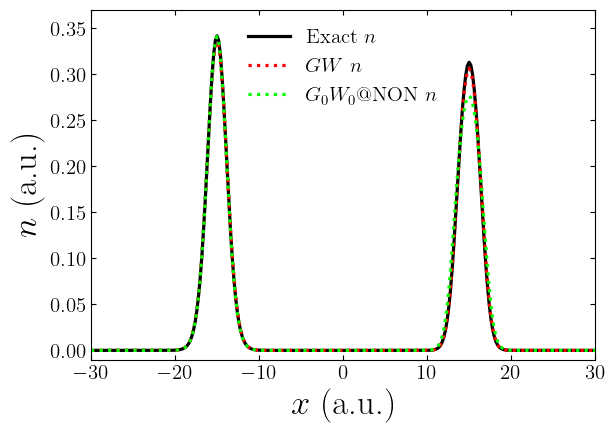

In [13]:
# Set figure size.
matplotlib.rcParams['figure.figsize'] = [7, 5]

# Build plot.
import pickle # Until the MBPT code is complete, here we will import the data directly. 
den_os = pickle.load(open('../data/raw/gs_mbpt_den1.db', 'rb'))
den_gw = pickle.load(open('../data/raw/gs_mbpt_den.db', 'rb'))
plt.plot(double_well.x, n_exact, linestyle='solid', linewidth=2.3, label='Exact $n$', color='k')
plt.plot(double_well.x, den_gw, linestyle='dotted', linewidth=2.3, label='$GW$ $n$', color='red')
plt.plot(double_well.x, den_os, linestyle='dotted', linewidth=2.3, label='$G_0W_0$@NON $n$', color='lime')

# Add the legend.
plt.legend(frameon=False)

# Configure axes.
plt.xlabel(r'$x$ (a.u.)', size=25)
plt.ylabel(r'$n$ (a.u.)', size=25)
plt.xlim(-30.0, 30.0)
plt.ylim(-0.01, 0.37)

# Clean up.
plt.tick_params(top='on', right='on')
plt.tick_params(direction='in')
plt.gcf().subplots_adjust(left=0.18)
plt.gcf().subplots_adjust(bottom=0.18)

# Show.
plt.show()

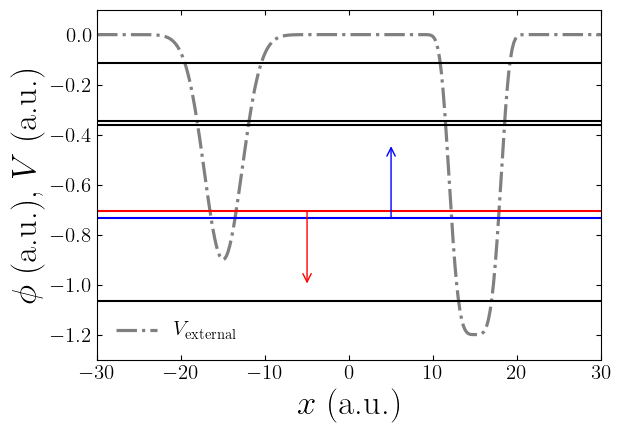

In [14]:
# Set figure size.
matplotlib.rcParams['figure.figsize'] = [7, 5]

# Build plot.
plt.plot(double_well.x, double_well.v_ext, linestyle='dashdot',linewidth=2.3, label='$V_{\mathrm{external}}$', color='grey')
colors = ['k', 'b', 'r', 'k', 'k', 'k']
x = []
for i in range(6):
    plt.axhline(y=state_non.up.energies[i], color=colors[i])
    
# Add the legend.
plt.legend(frameon=False)

# Add annotations.
plt.annotate("", xy=(5, state_non.up.energies[1] - 0.01), xytext=(5, state_non.up.energies[1] + 0.3), arrowprops=dict(arrowstyle="<-", color='b'))
plt.annotate("", xy=(-5, state_non.up.energies[2] + 0.01), xytext=(-5, state_non.up.energies[2] - 0.3), arrowprops=dict(arrowstyle="<-", color='r'))

# Configure axes.
plt.xlabel(r'$x$ (a.u.)', size=25)
plt.ylabel(r'$\phi$ (a.u.), $V$ (a.u.)', size=25)
plt.xlim(-30.0, 30.0)
plt.ylim(-1.3, 0.1)

# Clean up.
plt.tick_params(top='on', right='on')
plt.tick_params(direction='in')
plt.gcf().subplots_adjust(left=0.18)
plt.gcf().subplots_adjust(bottom=0.18)

# Show.
plt.show()

In [15]:
x = np.linspace(-30, 30, 301)
v_ext = -(6.0/5.0)*np.exp(-(1.0/125.0)*(x)**4)
v_int = iDEA.interactions.softened_interaction(x)
electrons = 'u'
single_well = iDEA.system.System(x, v_ext, v_int, electrons)
single_well.count

1

In [16]:
state_exact_1 = iDEA.methods.interacting.solve(single_well, k=0)
n_exact_1 = iDEA.observables.density(single_well, state=state_exact_1)

In [17]:
single_well.electrons = 'uu'
single_well.count

2

In [18]:
state_exact_2 = iDEA.methods.interacting.solve(single_well, k=0)
n_exact_2 = iDEA.observables.density(single_well, state=state_exact_2)

In [19]:
delta = 1e-4

In [20]:
n_exact = n_exact_1 + n_exact_2*delta/2.0

In [21]:
import sys
sys.path.insert(0, '../advantageous_nearsightedness')
import custom_non_interacting

In [22]:
custom_non_interacting.delta = delta

In [23]:
single_well.electrons = 'u'
kohn_sham_system = iDEA.reverse_engineering.reverse(single_well, n_exact, method=custom_non_interacting, mu=1.0, pe = 0.05)
v_ks = kohn_sham_system.v_ext
v_h = iDEA.observables.hartree_potential(single_well, n_exact)
v_xc = v_ks - single_well.v_ext - v_h

iDEA.reverse.reverse: convergence = 1.0043e-12, tollerance = 1e-12


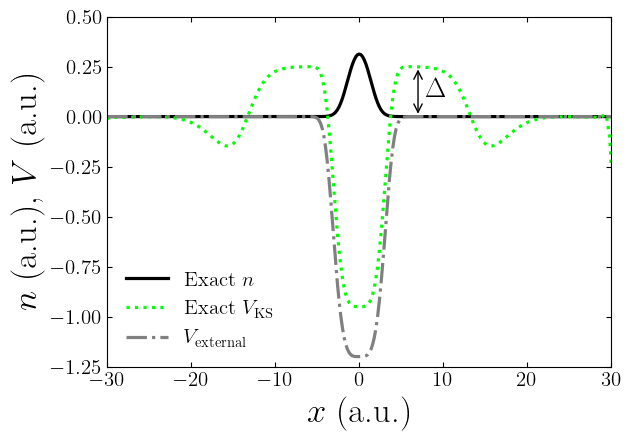

In [24]:
# Set figure size.
matplotlib.rcParams['figure.figsize'] = [7, 5]

# Build plot.
plt.plot(single_well.x, n_exact, linestyle='solid',linewidth=2.3, label='Exact $n$', color='k')
plt.plot(single_well.x, v_ks+0.25, linestyle='dotted',linewidth=2.3, label='Exact $V_{\mathrm{KS}}$', color='lime')
plt.plot(single_well.x, single_well.v_ext, linestyle='dashdot',linewidth=2.3, label='$V_{\mathrm{external}}$', color='grey')

# Add the legend.
plt.legend(frameon=False)

# Configure axes.
plt.xlabel(r'$x$ (a.u.)', size=25)
plt.ylabel(r'$n$ (a.u.), $V$ (a.u.)', size=25)
plt.xlim(-30.0, 30.0)
plt.ylim(-1.25, 0.5)

# Add annotations.
plt.text(8, 0.1, "$\Delta$", fontsize=20)
plt.annotate("", xy=(7, 0.25), xytext=(7, 0), arrowprops=dict(arrowstyle="<->"))

# Clean up.
plt.tick_params(top='on', right='on')
plt.tick_params(direction='in')
plt.gcf().subplots_adjust(left=0.18)
plt.gcf().subplots_adjust(bottom=0.18)

# Show.
plt.show()

In [25]:
state_hf = iDEA.methods.hartree_fock.solve(single_well, k=0)
state_hf.up.occupations[single_well.up_count] = delta
state_hf.up.occupied = np.nonzero(state_hf.up.occupations)[0]
n_hf = iDEA.observables.density(single_well, state=state_hf)
p_hf = iDEA.observables.density_matrix(single_well, state=state_hf)
v_x = iDEA.observables.exchange_potential(double_well, p_hf)

iDEA.methods.hartree_fock.solve: convergence = 8.2589e-15, tollerance = 1e-10


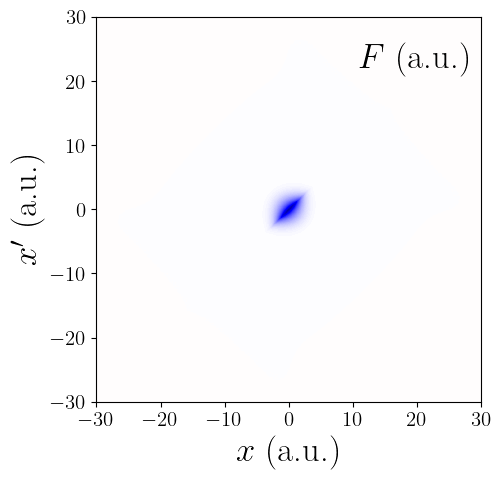

In [26]:
# Set figure size.
matplotlib.rcParams['figure.figsize'] = [7, 5]

# Build plot.
plt.imshow(np.flipud(v_x), vmin=-0.4, vmax=0.4, extent=[-30,30,-30,30], cmap='seismic', interpolation='hamming')
plt.xlabel(r'$x$ (a.u.)', size=25)
plt.ylabel(r'$x^\prime$ (a.u.)', size=25)

# Add annotations.
plt.text(11, 22, "$F$ (a.u.)", fontsize=25)

# Show.
plt.show()